In [1]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.0.dev0+3562e26', 'qiskit-aer': '0.9.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.0.dev0+8455b01', 'qiskit-aqua': None, 'qiskit': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='anl', project='csc430')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_sydney') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc43

In [3]:
import math
import numpy as np
import random
import re
import qiskit.tools.jupyter

from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import StochasticSwap, BasicSwap

from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
%matplotlib inline

from qiskit.providers.aer import AerSimulator

In [4]:
device = provider.get_backend('ibmq_casablanca')
backend_monitor(device)
device

ibmq_casablanca
Configuration
-------------
    n_qubits: 7
    operational: True
    status_msg: dedicated
    pending_jobs: 10
    backend_version: 1.2.49
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    supported_instructions: ['u1', 'setf', 'measure', 'delay', 'u3', 'id', 'play', 'x', 'shiftf', 'rz', 'cx', 'sx', 'reset', 'acquire', 'u2']
    supported_features: ['q', 'o', 'b', 'j']
    dt: 0.2222222222222222
    conditional: False
    pulse_num_qubits: 3
    channels: {'acquire0': {'operates': {'qubits': [0]}, 'purpose': 'acquire', 'type': 'acquire'}, 'acquire1': {'operates': {'qubits': [1]}, 'purpose': 'acquire', 'type': 'acquire'}, 'acquire2': {'operates': {'qubits': [2]}, 'purpose': 'acquire', 'type': 'acquire'}, 'acquire3': {'operates': {'qubits': [3]}, 'purpose': 'acquire', 'type': 'acquire'}, 'acquire4': {'operates': {'qubits': [4]}, 'purpose': 'acquire', 'type': 'acquire'}, 'acquire5': {'operates': {'qubits': [5]}, 'purpose': 

Qubits [Name / Freq / T1 / T2 / RZ err / SX err / X err / Readout err]
----------------------------------------------------------------------
    Q0 / 4.82191 GHz / 124.14589 us / 36.01493 us / 0.00000 / 0.00034 / 0.00034 / 0.02790 
    Q1 / 4.75977 GHz / 78.72906 us / 90.86573 us / 0.00000 / 0.00024 / 0.00024 / 0.01130 
    Q2 / 4.90631 GHz / 92.73517 us / 106.61660 us / 0.00000 / 0.00027 / 0.00027 / 0.00800 
    Q3 / 4.87912 GHz / 126.00562 us / 138.11647 us / 0.00000 / 0.00023 / 0.00023 / 0.01920 
    Q4 / 4.87068 GHz / 85.63652 us / 57.99892 us / 0.00000 / 0.00022 / 0.00022 / 0.02560 
    Q5 / 4.96403 GHz / 93.48693 us / 148.57524 us / 0.00000 / 0.00028 / 0.00028 / 0.01140 
    Q6 / 5.17711 GHz / 111.47978 us / 171.48608 us / 0.00000 / 0.00087 / 0.00087 / 0.02250 

Multi-Qubit Gates [Name / Type / Gate Error]
--------------------------------------------
    cx6_5 / cx / 0.00670
    cx5_6 / cx / 0.00670
    cx5_4 / cx / 0.00767
    cx4_5 / cx / 0.00767
    cx5_3 / cx / 0.00947
    c

<IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>

In [5]:
from gate_variants.toffoli_variants import CCX_01_12_Gate, CCX_02_01_Gate, CCX_02_01_h_Gate, CCX_01_02_Gate

In [6]:
circ_list = []

In [7]:
ccx_variant_list = [CCX_01_12_Gate(), CCX_02_01_Gate(), CCX_02_01_h_Gate(), CCX_01_02_Gate()]

In [8]:
for i in range(len(ccx_variant_list)):
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr,cr)
    qc.x(qr[0])
    qc.x(qr[1])
    qc.append(ccx_variant_list[i],[qr[0],qr[1],qr[2]])
    qc.measure(qr,cr)
    circ_list.append(qc)

In [9]:
trans_1 = transpile(circ_list[2], optimization_level = 3)

In [10]:
trans_1.draw()

┌───┐       ┌───┐ ┌───┐ ┌───┐┌─────┐                                ┌─┐»
q2_0: ┤ X ├───────┤ X ├─┤ T ├─┤ X ├┤ Tdg ├───────■─────────────────────■──┤M├»
      ├───┤┌─────┐└─┬─┘ └───┘ └─┬─┘└┬───┬┘┌───┐┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐└╥┘»
q2_1: ┤ X ├┤ Tdg ├──┼───────────┼───┤ X ├─┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├─╫─»
      ├───┤└─────┘  │  ┌─────┐  │   └─┬─┘ └───┘└───┘└─────┘└─┬─┘├───┤└┬─┬┘ ║ »
q2_2: ┤ H ├─────────■──┤ Tdg ├──■─────■──────────────────────■──┤ H ├─┤M├──╫─»
      └───┘            └─────┘                                  └───┘ └╥┘  ║ »
c2: 3/═════════════════════════════════════════════════════════════════╩═══╩═»
                                                                       2   0 »
«         
«q2_0: ───
«      ┌─┐
«q2_1: ┤M├
«      └╥┘
«q2_2: ─╫─
«       ║ 
«c2: 3/═╩═
«       1

In [11]:
len(circ_list)

4

In [12]:
#run the circuit on a device
shots = 8192
job = execute(circ_list, backend=device, shots=shots)
job_monitor(job)
res = job.result()

Job Status: job has successfully run


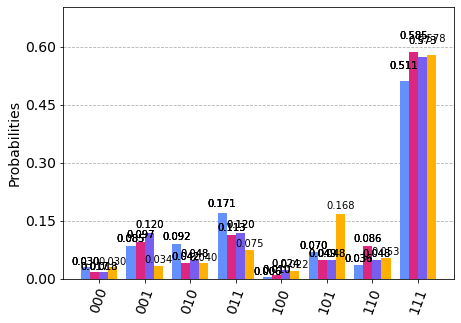

In [13]:
plot_histogram(res.get_counts())

In [14]:
res.get_counts(0)['000']

245

In [15]:
#calculating inferece strength
def IST(input_dict, correct_output):
    correct_count = input_dict[correct_output]
    max_error_count = 0
    for key in input_dict.keys():
        if key != correct_output and input_dict[key] > max_error_count:
            max_error_count = input_dict[key]
    return correct_count/max_error_count

In [16]:
for i in range(len(circ_list)):
    ist = IST(res.get_counts(i), '111')
    print(ist)

2.99
5.183982683982684
4.783095723014257
3.4361393323657476


In [17]:
#IST of summation:
sum_res = {}
for key in res.get_counts(0):
    sum_res[key] = 0
    for i in range(len(circ_list)):
        sum_res[key] += res.get_counts(i)[key]

In [18]:
sum_res

{'000': 784,
 '001': 2745,
 '010': 1824,
 '011': 3919,
 '100': 507,
 '101': 2750,
 '110': 1831,
 '111': 18408}

In [19]:
IST(sum_res, '111')

4.697116611380454